# <h1 style="color: blue; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;">Credit Card Spending Habits </h1>

# About 

About this file :

This dataset contains insights into credit card transactions made in India, offering a comprehensive look at the spending habits of Indians across the nation

* City: The city in which the transaction took place. (String)
* Date: The date of the transaction. (Date)
* Card Type: The type of credit card used for the transaction. (String)
* Exp Type: The type of expense associated with the transaction. (String)
* Gender: The gender of the cardholder. (String)
* Amount: The amount of the transaction. (Number)

## Importing necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
pd.options.display.max_columns=50

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Importing Data Set


In [2]:
df=pd.read_csv("/kaggle/input/analyzing-credit-card-spending-habits-in-india/Credit card transactions - India - Simple.csv", index_col='index')
df

,City,Date,Card Type,Exp Type,Gender,Amount
index,,,,,,
0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
...,...,...,...,...,...,...
26047,"Kolkata, India",22-Jun-14,Silver,Travel,F,128191
26048,"Pune, India",3-Aug-14,Signature,Travel,M,246316
26049,"Hyderabad, India",16-Jan-15,Silver,Travel,M,265019


## Workflow
* Understanding the data
* Data cleaning
* Exploratory Data Analysis
* Insights 

# <h1 style="color: black; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;">Understanding the data </h1>

# **Shape of the data**

In [3]:
df.shape

(26052, 6)

# **Information of the data**
**But what does the columns mean and what is it used for?**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       26052 non-null  object
 1   Date       26052 non-null  object
 2   Card Type  26052 non-null  object
 3   Exp Type   26052 non-null  object
 4   Gender     26052 non-null  object
 5   Amount     26052 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


**Insights:
1. Date column must be in Datetime Datatype.
2. No Null values in any columns.


# **Check duplicate Values**

In [5]:
df.duplicated().sum()

0

# <h1 style="color: black; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;">Data Cleaning </h1>

# ** Object to Date datatype Conversion**

In [6]:
df["Date"]=pd.to_datetime(df["Date"])
df.dtypes


City                 object
Date         datetime64[ns]
Card Type            object
Exp Type             object
Gender               object
Amount                int64
dtype: object

**Q1. Which card type is most popular. Represent through piechart**

In [7]:

m_card =df["Card Type"].value_counts()
m_card



Silver       6840
Signature    6447
Platinum     6398
Gold         6367
Name: Card Type, dtype: int64

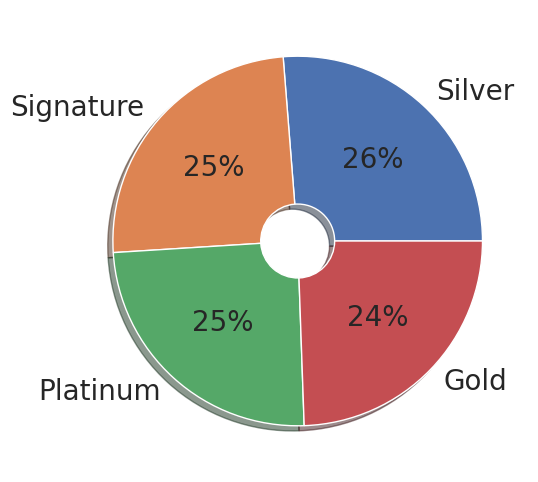

In [8]:
plt.figure(figsize=(6,6))
l=["Silver","Signature","Platinum","Gold"]
plt.pie(m_card,labels=l,shadow=True,autopct="%0.0f%%",textprops={'fontsize': 20},wedgeprops={"width":0.8})
plt.show()

**Answer: Silver card type is the most popular.**

**Q2. Which expense type is most popular. Represent through graph**

In [9]:
m_exp = df['Exp Type'].value_counts()
m_exp


Food             5463
Fuel             5257
Bills            5078
Entertainment    4762
Grocery          4754
Travel            738
Name: Exp Type, dtype: int64

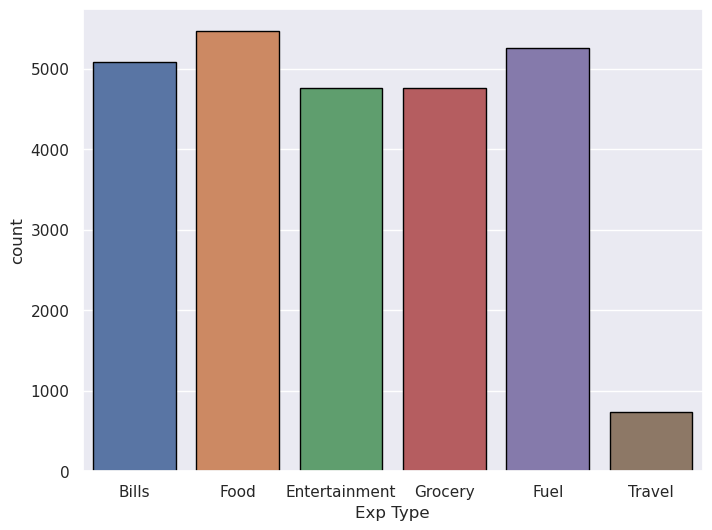

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x ="Exp Type",data=df,edgecolor="black")
plt.show()

**Answer: Food Expense type is the most popular.**

**Q3. Which gender spend more in Credit Card? Show through piechart.**

In [11]:
m_gen = df["Gender"].value_counts()
m_gen

F    13680
M    12372
Name: Gender, dtype: int64

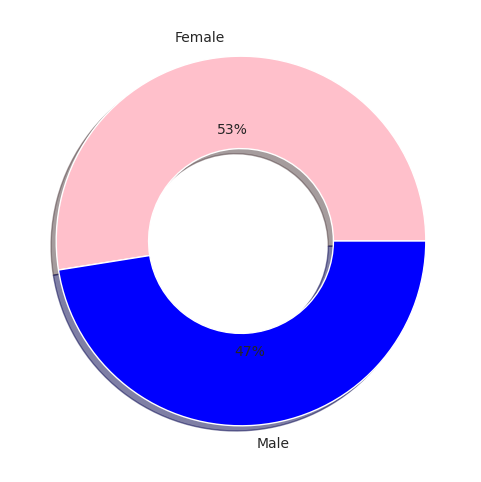

In [12]:
plt.figure(figsize=(6,6))
gen = ["Female","Male"]
plt.pie(m_gen,labels=gen,shadow=True,autopct="%0.0f%%",textprops={"fontsize":10},colors=["pink","blue"],wedgeprops={'width': 0.5})
plt.show()

**Answer: Female spends more in credit cards.**

**Q4. Which is the peak month for credit card usage? Represent through graph.**

In [13]:
df["Month"] = df["Date"].dt.month_name()
p_mnth = df["Month"].value_counts()
p_mnth 

January      2722
December     2702
October      2665
March        2622
November     2622
April        2587
May          2436
February     2433
August       1393
September    1321
July         1310
June         1239
Name: Month, dtype: int64

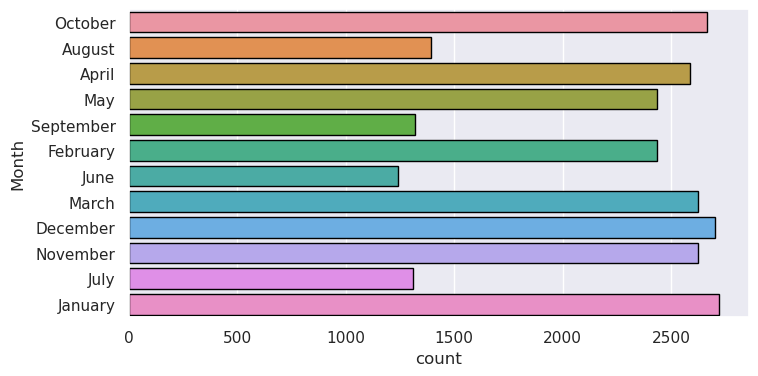

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(y="Month",data=df,edgecolor="black")
plt.show()

Answer:January is the peak month for credit card usage.

**Q5.Find top 5 cities of India which all spended credit card maximum .**

In [15]:
max_city = pd.DataFrame(df['City'].value_counts())[0:5]
max_city

,City
"Bengaluru, India",3552
"Greater Mumbai, India",3493
"Ahmedabad, India",3491
"Delhi, India",3482
"Hyderabad, India",784


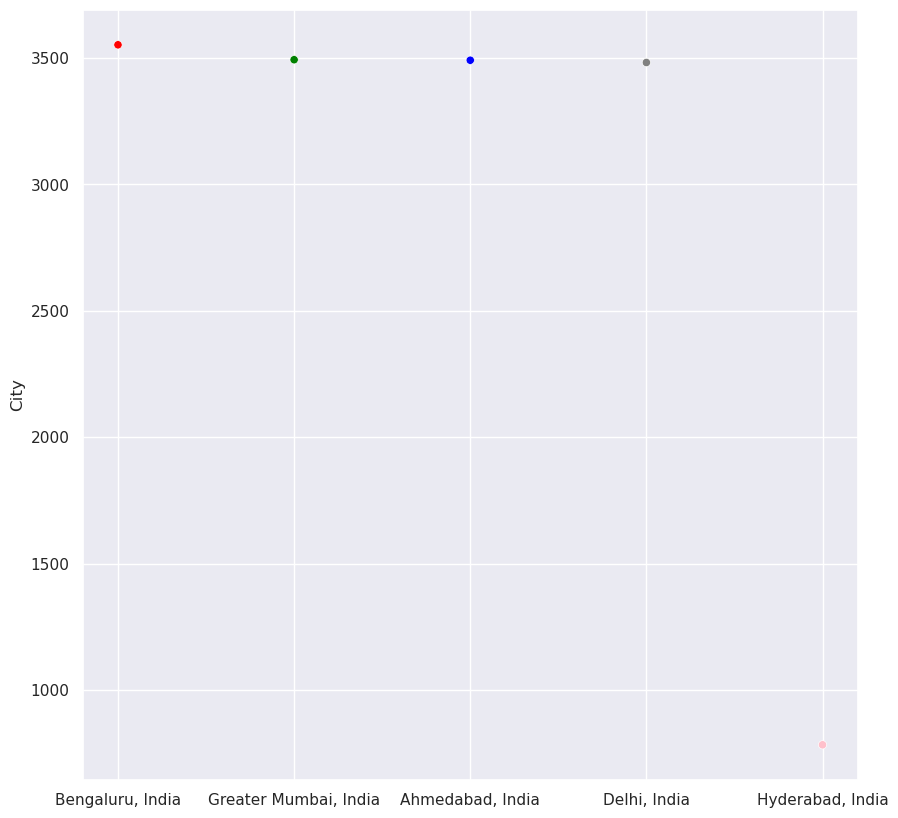

In [16]:
plt.figure(figsize=(10,10))
colors = np.array(["red","green","blue","grey","pink"])
sns.scatterplot(max_city, x=max_city.index, y='City',c=colors)  
plt.show()

**Q6. Which card type were mostly used by the Males and Females? Represent the comparison through graph**

In [17]:
card_gen = pd.DataFrame(df.groupby('Gender')['Card Type'].value_counts())
card_gen

Card Type
Gender Card Type           
F      Silver          3773
       Signature       3368
       Gold            3287
       Platinum        3252
M      Platinum        3146
       Gold            3080
       Signature       3079
       Silver          3067

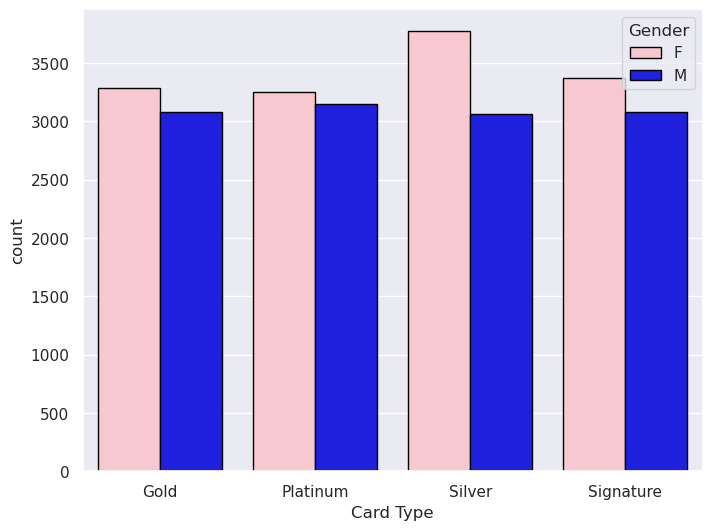

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x="Card Type",hue="Gender",data=df,palette=["pink","blue"],edgecolor="black")
plt.show()

Answer: Females used the Silver card type where as Males have used the platinum card types more.

**Q7.Find out the expenses of credit card of Males and Females monthwise**

In [19]:
exp_m_g = df.groupby(['Gender','Month'])['Amount'].sum()
exp_m_g

Gender  Month    
F       April        225640906
        August       114659155
        December     220813597
        February     210401905
        January      227700168
        July         106087028
        June         100563540
        March        225659403
        May          211850293
        November     217110069
        October      230188235
        September    114636731
M       April        190753828
        August       103793971
        December     196121818
        February     173110719
        January      203509388
        July          91894388
        June          90757499
        March        184395043
        May          163605316
        November     186997899
        October      189657772
        September     94924702
Name: Amount, dtype: int64

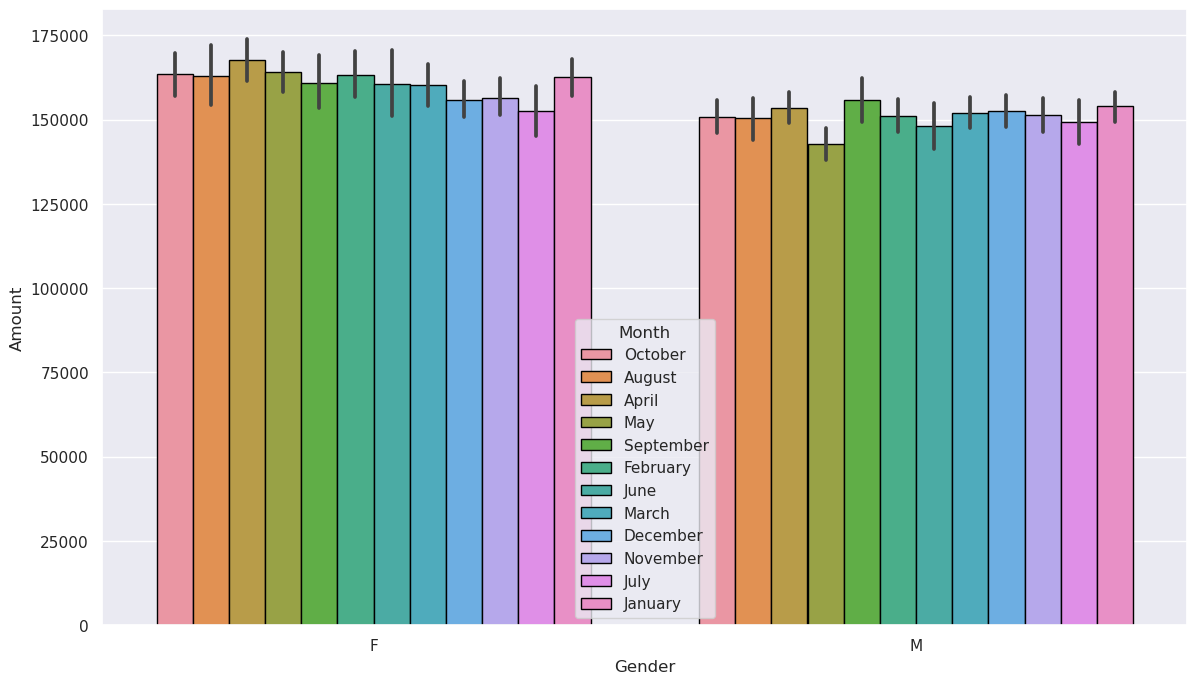

In [20]:
plt.figure(figsize=(14,8))
sns.barplot(x="Gender",y="Amount",hue="Month",data=df,edgecolor="black")
plt.show()

In [21]:
df.to_csv("Credit Card Spending Habits.csv")

# <h1 style="color:black,text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;">Conclusion</h1>

* Silver card types were most in the payments . 
* In Fuel and Food expenses were most counts paid by the cards.
* In January and December there is high usage of cards payments.
* Bengaluru,Greater Mumbai, Ahmedabad, Delhi These are the Top 4 Cities were card usage were more.
* Females used the Silver card type were as male have used the platinum card types more.
* Females were more depend on credit cards as they spend more amount on credit cards than men. 
* Females and Males mostly spend amount on Bills and Food using credit card.
* Females mostly spend in October and Males in january using credit cards.
